# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

#### Install Packages :

In [ ]:
%pip install -r requirements.txt

Last week we collected posts related to yellowstone from social media :

In [34]:
import sqlite3
import pandas as pd

con = sqlite3.connect('data/co_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,score,permalink,comments,n_comments
0,Dug up some more shots from Avalanche,14,/r/yellowstone/comments/1j4e110/dug_up_some_mo...,['Those painted rocks are so tacky. People nee...,7
1,Concerned residents near Yellowstone National ...,1431,/r/yellowstone/comments/1j3gyfd/concerned_resi...,['Pew reported that 75% of republican voters h...,28
2,Binoculars,4,/r/yellowstone/comments/1j4d5jo/binoculars/,['Vortex Diamondback 10×42. Should be less tha...,14
3,Up on Avalanche,72,/r/yellowstone/comments/1j3u1x7/up_on_avalanche/,"['One of my favorite places.', 'Thanks for sha...",7
4,Looking to visit in May!,0,/r/yellowstone/comments/1j4dvqc/looking_to_vis...,['It’s still crowded in May (took us about 45 ...,4
5,Best route from South Entrance to Mammoth?,8,/r/yellowstone/comments/1j3o5px/best_route_fro...,"[""which is faster will be impossible to say, c...",11
6,Boots?!,3,/r/yellowstone/comments/1j3qja4/boots/,['I have a pair of Danners that are super stur...,39
7,Visiting,0,/r/yellowstone/comments/1j3kw58/visiting/,"[""Make lodging reservations now as they book m...",18
8,Coyotes,428,/r/yellowstone/comments/1j29c99/coyotes/,['Wow that dual howling picture is incredible!...,5
9,Is West Yellowstone worth visiting?,11,/r/yellowstone/comments/1j2sas3/is_west_yellow...,['The ONLY reason I would say yes is if you de...,29


#### Keyword sentiment analysis :

In [35]:
sentiment_df = pd.read_csv('data/AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


The dataframe to a dictionary :

In [36]:
sentiment_dict = sentiment_df.to_dict()['score']
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [37]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

df['keyword_sentiment'] = title_sentiments
print(f'Mean: {df["keyword_sentiment"].mean()}') 
print(f'Median: {df["keyword_sentiment"].median()}')

Mean: 0.08285714285714285
Median: 0.0


New column in our original dataframe with sentiments :

In [38]:
titles=df['title']
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
0,Dug up some more shots from Avalanche,0.000000
1,Concerned residents near Yellowstone National ...,0.000000
2,Binoculars,0.000000
3,Up on Avalanche,0.000000
4,Looking to visit in May!,0.000000
6,Boots?!,0.000000
7,Visiting,0.000000
8,Coyotes,0.000000
9,Is West Yellowstone worth visiting?,0.400000
5,Best route from South Entrance to Mammoth?,0.428571


Overall, we can see the sentiments are positive and lean towards 0 . It looks like neutral but may mean that no words were in the lookup dictionary.

Top 10 sentiments :

In [39]:
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Best route from South Entrance to Mammoth?',
 'Is West Yellowstone worth visiting?',
 'Dug up some more shots from Avalanche',
 'Concerned residents near Yellowstone National Park organizing to save National Park Service jobs',
 'Binoculars',
 'Up on Avalanche',
 'Looking to visit in May!',
 'Boots?!',
 'Visiting',
 'Coyotes']

#### Python packages sentiment analysis :

In [40]:
from textblob import TextBlob

tb = TextBlob("Yellowstone is great...")
tb.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

Textblob gives us polarity (-1 to =1) and subjectivite (0 to 1, objective to subjective).

In [41]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)
df['tb_sentiment']

0    0.5
1    0.1
2    0.0
3    0.0
4    0.0
5    1.0
6    0.0
7    0.0
8    0.0
9    0.3
Name: tb_sentiment, dtype: float64

Distribution of these sentiments by using Histogram :

<Axes: ylabel='Frequency'>

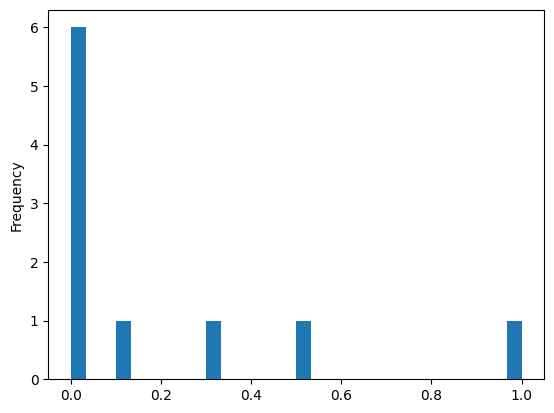

In [42]:
df['tb_sentiment'].plot.hist(bins=30)

In [43]:
print(f'Means: {df["tb_sentiment"].mean()}')
print(f'Median: {df["tb_sentiment"].median()}')

Means: 0.19
Median: 0.0


VADER sentiment analysis :

In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("Yellowstone is great...")

{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}

vader to the whole df :

In [45]:
df['compound'] = [analyzer.polarity_scores(i)['compound'] for i in df['title']]
print(f'Mean compound: {df["compound"].mean()}')
print(f'Median compound: {df["compound"].median()}')

Mean compound: 0.13571
Median compound: 0.0


Histogram for overall overall sentiment score :

<Axes: ylabel='Frequency'>

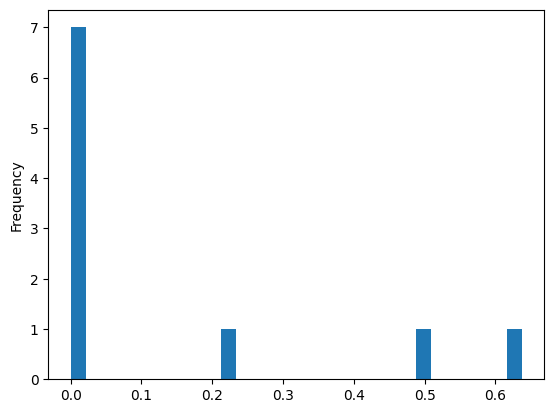

In [46]:
df['compound'].plot.hist(bins=30)

# Summary

Last week colleced social media data related to Yellostone.


- Yellowstone is National park. which is in Wyoming state.
- It's famous for Geyser [predictable eruptions], A stunning, colorful hot spring, wildlife like bison, grizzly bears, wolves, and elk.
- It plays a crucial role in wildlife preservation and ecosystem studies.

Analyzed the sentiment of post titles using sentiment analysis techniques :
- keyword method
- Python packages
- VADER

- plotted a histogram by using each sentiment analysis method.
- examined descriptive statistics such as mean, median.
- For keyword sentimate analysis, The mean sentiment score is 0.0828, while the median sentiment score is 0.0, indicating that most posts had neutral sentiment.
- By using textblob python package, The median being 0.0 in both cases suggests that a significant portion of posts are neutral. The mean sentiment score is slightly higher when using the Python package (0.19 vs. 0.0828) indicating it more leaned towards positive. 
- Histogram plotting describes sentimates distribution which can help to identify sentimates are leaned towards positive side or negative side.

This is how we can use this data to adjust marketing or engagement strategies. Also we can aligned with social media trends and adopt marketing actions. It can help to maintain brand reputation. 

Particularly In case of Yellowstone, Sentiment analysis can be used to track public opinion. we can identify how public perception of yellowstone changes. If sentiment is highly positive, it could be due to exciting events, park reopenings, or positive TV series news. If sentiment is negative, it could be linked to wildfires, environmental concerns. By continuously monitoring social media sentiment, stakeholders can enhance visitor experiences, address environmental issues, and refine media strategies based on public perception.